In [1]:
import loompy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = '/home/lars/storage/Documents/Cortex_FISH/CountsV1-1.loom' 

In [3]:
loompy.connect(file_name)

,CellArea,23939.0,13532.0,28819.0,40777.0,16303.0,9065.0,23155.0,44564.0,18963.0,19373.0,...
,CellID,1124,2325,2400,241,6248,5992,275,2573,330,1149,...
genes,,,,,,,,,,,,...
Hybridization1_Tbr1,,13.0,11.0,28.0,12.0,7.0,6.0,14.0,24.0,5.0,3.0,...
Hybridization1_Aldoc,,38.0,0.0,9.0,5.0,38.0,2.0,4.0,3.0,7.0,10.0,...
Hybridization1_Foxj1,,0.0,0.0,0.0,1.0,5.0,0.0,3.0,1.0,1.0,1.0,...
Hybridization6_Bmp4,,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...
Hybridization6_Itpr2,,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,...
Hybridization6_Vip,,13.0,1.0,2.0,4.0,30.0,1.0,3.0,2.0,1.0,4.0,...
Hybridization4_Cnr1,,0.0,0.0,0.0,0.0,65.0,5.0,0.0,0.0,0.0,0.0,...
Hybridization4_Plp1,,16.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0,0.0,...


In [4]:
def loompy2data(filename):
    ds = loompy.connect(filename)
    return pd.DataFrame(data=ds[:,:], columns=ds.col_attrs['CellID'], index=ds.row_attrs['genes']).astype(int)

df = loompy2data(file_name)

In [29]:
df.index

Index(['Hybridization1_Tbr1', 'Hybridization1_Aldoc', 'Hybridization1_Foxj1',
       'Hybridization6_Bmp4', 'Hybridization6_Itpr2', 'Hybridization6_Vip',
       'Hybridization4_Cnr1', 'Hybridization4_Plp1', 'Hybridization4_Vtn',
       'Hybridization7_Rorb', 'Hybridization7_Sox10', 'Hybridization7_Ctps',
       'Hybridization11_Syt6', 'Hybridization11_Tbr1', 'Hybridization11_Tmem6',
       'Hybridization8_Pdgfra', 'Hybridization8_Serpinf1',
       'Hybridization8_Pthlh', 'Hybridization10_Crhbp', 'Hybridization10_Crh',
       'Hybridization10_Apln', 'Hybridization9_Lamp5', 'Hybridization9_Lum',
       'Hybridization9_Anln', 'Hybridization12_Kcnip',
       'Hybridization12_Slc32a1', 'Hybridization12_Vtn',
       'Hybridization5_Acta2', 'Hybridization5_Cpne5', 'Hybridization5_Klk6',
       'Hybridization3_Mfge8', 'Hybridization3_Mrc1', 'Hybridization3_Hexb',
       'Hybridization2_Gad2', 'Hybridization2_Flt1', 'Hybridization2_Gfap',
       'Hybridization13_Cnr1', 'Hybridization13_Ttr', 'H

In [38]:
gene_sort = ['Gad2', 'Slc32a1', 'Crhbp', 'Pthlh', 'Cnr1', 'Vip', 'Cpne5', 'Crh', 
             'Tbr1', 'Lamp5', 'Kcnip2', 'Rorb', 'Syt6', 
             'Aldoc', 'Gfap', 'Serpinf1', 'Mfge8', 
             'Sox10', 'Plp1', 'Pdgfra', 'Tmem2', 'Itpr2', 'Ctps', 'Bmp4', 'Anln',  'Klk6', 
             'Hexb', 'Mrc1',
             'Ttr', 
             'Foxj1', 
             'Vtn', 'Flt1', 'Apln', 'Acta2',  'Lum'] 

gene_sort_wrong = ['Gad2', 'Slc32a1', 'Crhbp', 'Pthlh', 'Cnr1', 'Vip', 'Cpne5', 'Crh', 
             'Tbr1', 'Lamp5', 'Kcnip', 'Rorb', 'Syt6', 
             'Aldoc', 'Gfap', 'Serpinf1', 'Mfge8', 
             'Sox10', 'Plp1', 'Pdgfra', 'Tmem6', 'Itpr2', 'Ctps', 'Bmp4', 'Anln',  'Klk6', 
             'Hexb', 'Mrc1',
             'Ttr', 
             'Foxj1', 
             'Vtn', 'Flt1', 'Apln', 'Acta2',  'Lum'] 

In [36]:
#The following genes have a wrong annotation:
df_genes = []
for i in df.index:
    df_genes.append(i.split('_')[1])
df_genes

for g in df_genes:
    if g not in gene_sort:
        print(g)

Tmem6
Kcnip


In [39]:
#Gene sort on the wrongly annotated genes

probe_sort = []

for i in gene_sort_wrong:
    for j in df.index:
        if j.endswith(i):
            probe_sort.append(j)

probe_sort


['Hybridization2_Gad2',
 'Hybridization12_Slc32a1',
 'Hybridization10_Crhbp',
 'Hybridization8_Pthlh',
 'Hybridization4_Cnr1',
 'Hybridization13_Cnr1',
 'Hybridization6_Vip',
 'Hybridization5_Cpne5',
 'Hybridization10_Crh',
 'Hybridization1_Tbr1',
 'Hybridization11_Tbr1',
 'Hybridization9_Lamp5',
 'Hybridization12_Kcnip',
 'Hybridization7_Rorb',
 'Hybridization11_Syt6',
 'Hybridization1_Aldoc',
 'Hybridization2_Gfap',
 'Hybridization8_Serpinf1',
 'Hybridization3_Mfge8',
 'Hybridization7_Sox10',
 'Hybridization4_Plp1',
 'Hybridization13_Plp1',
 'Hybridization8_Pdgfra',
 'Hybridization11_Tmem6',
 'Hybridization6_Itpr2',
 'Hybridization7_Ctps',
 'Hybridization6_Bmp4',
 'Hybridization9_Anln',
 'Hybridization5_Klk6',
 'Hybridization3_Hexb',
 'Hybridization3_Mrc1',
 'Hybridization13_Ttr',
 'Hybridization1_Foxj1',
 'Hybridization4_Vtn',
 'Hybridization12_Vtn',
 'Hybridization2_Flt1',
 'Hybridization10_Apln',
 'Hybridization5_Acta2',
 'Hybridization9_Lum']

In [33]:
len(probe_sort)

37

In [ ]:
# Log normal data on dataframe

# Add 1 to all values, otherwise you can not log normalize
df = df + 1
# Log2 transform
df = df.apply(np.log2)
# Substract (df.sub(x, y)) the mean of the row (df.mean(axis=1)) from the values in the colums (axis = 0)
df = df.sub(df.mean(axis=1), axis = 0)
df.head(3)

In [5]:
X = df.values.astype(np.float64)
X.shape

(39, 6471)

In [6]:
#Clean cells that have less than 10 molecules
X = X[:,X.sum(0)>10]
X.shape

(39, 6418)

In [7]:
#Maybe normalize here with the real cell size
X_norm = X.sum(0).mean() * (X/X.sum(0))

(array([  47.,  153.,  271.,  360.,  423.,  510.,  513.,  498.,  470.,
         456.,  420.,  313.,  298.,  239.,  217.,  175.,  146.,  122.,
         110.,   99.,   77.,   75.,   61.,   56.,   40.,   41.,   27.,
          17.,   13.,   14.,   12.,   20.,   11.,   12.,   10.,    5.,
           7.,    5.,    7.,    7.,    7.,    2.,    1.,    3.,    4.,
           4.,    5.,    0.,    0.,    4.,    1.,    1.,    1.,    1.,
           2.,    1.,    3.,    4.,    1.,    1.,    3.,    1.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.]),
 array([    0.        ,    20.2020202 ,    40.4040404 ,    60.60606061,
           80.80808081,   101.01010101,   121.21212121,   141.41414141,
          161.61616162,   181.81818182,   202.02020202,   222.22222222,
 

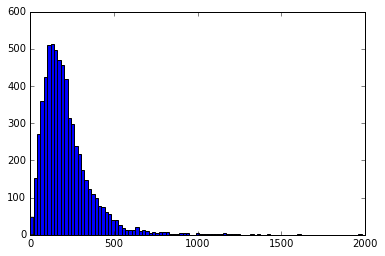

In [8]:
plt.hist(X.sum(0), bins=np.linspace(0,2000, 100))

In [9]:
np.where(X.sum(0) < 1)

(array([], dtype=int64),)

In [10]:
np.isfinite(X_norm.sum(0))

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [11]:
X_log = np.log2(X_norm+1)
X_log

array([[ 3.30106638,  4.22128313,  4.7448433 , ...,  4.67165387,
         5.5018581 ,  2.59411577],
       [ 4.74889321,  0.        ,  3.21675463, ...,  2.67701234,
         2.56649471,  3.33181112],
       [ 0.        ,  0.        ,  0.        , ...,  0.50082569,
         0.        ,  2.33071634],
       ..., 
       [ 0.74954668,  1.3811484 ,  1.50780101, ...,  1.41147653,
         0.        ,  2.81676886],
       [ 1.240332  ,  0.        ,  0.        , ...,  0.8718802 ,
         3.06790131,  0.        ],
       [ 2.965811  ,  3.17373213,  1.91289655, ...,  1.16676013,
         3.43927315,  1.00549893]])

In [12]:
X_log.sum(1)

array([ 23956.26344253,  17006.93602336,   6741.19530409,   3227.96924451,
         6627.83751996,  12348.2000623 ,   7504.06838711,   7549.71462085,
         8378.49227544,  10078.56884531,  14527.89081996,  16354.35575642,
         8834.4420013 ,  19891.50170882,   7630.16876172,   7527.94262386,
        15306.38686373,   4005.82441178,   4123.40298659,   5598.42621817,
        11086.22953962,  22271.69657088,   2663.54541868,  14499.13234934,
        21121.0765409 ,   7342.91427835,   8520.84431964,   9548.97663251,
         8701.89148844,    831.75039646,  12205.24175618,  14425.82609812,
        12136.85666857,  17753.98831517,   2398.59677347,   9359.38294235,
        12433.92227046,   9057.64195349,  10310.64065409])

In [13]:
from sklearn.decomposition import PCA


In [14]:
pca = PCA()
pc = pca.fit_transform(X_log.T)

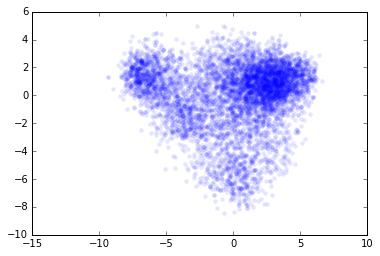

In [15]:
plt.scatter(pc[:,0], pc[:,1], alpha=0.1, lw=0)

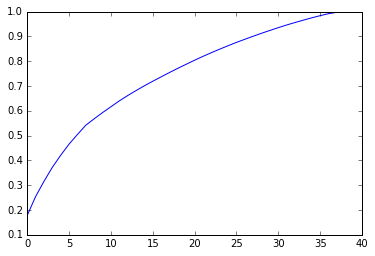

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pc.shape

In [17]:
from sklearn.manifold import TSNE

In [18]:
model = TSNE(n_components=2, perplexity=2.5, early_exaggeration=5, learning_rate=400, 
             n_iter=1000, n_iter_without_progress=30, min_grad_norm=1e-07, metric='euclidean', 
             init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)
np.set_printoptions(suppress=True)
#Transpose the df to work on the cells
points = model.fit_transform(pc[:,:35]) 

In [19]:
model = TSNE()
#Transpose the data to work on the cells
points4 = model.fit_transform(pc[:,:9]) 

In [ ]:
model = TSNE()
tSNE_ncomp = {}
for components in range(2, pc.shape[1]):
    name = 'points_' + str(components)
    tSNE_ncomp[name] = model.fit_transform(pc[:,:components])
    print('Done with: {}'.format(name))
    
    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
def scatter(tSNE_data):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(tSNE_data[:,0], tSNE_data[:,1], lw=0, s=40, alpha = 0.2, c = 'blue')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')
    
    return f, ax, sc

In [ ]:
scatter(points) #9pc

In [ ]:
scatter(points2) # 20 pc

In [ ]:
scatter(points3) #15 pc

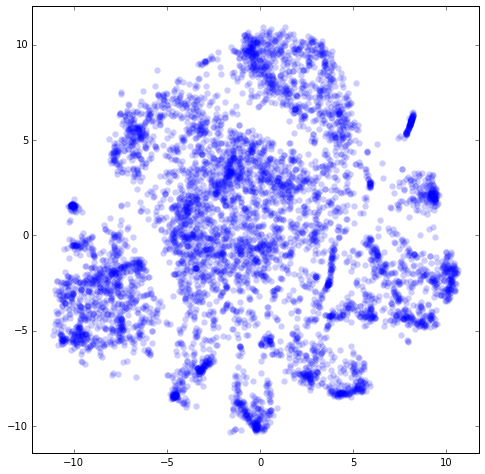

In [45]:
scatter(points4) #35 pc
plt.savefig('35pc_default-param_tSNE_no-exclusion.png', dpi=150)

In [ ]:
for i in range(2, len(tSNE_ncomp.keys())+1):
    print(i)

In [ ]:
len(tSNE_ncomp.keys())

In [ ]:
tSNE_ncomp.keys()

In [ ]:
plt.figure(figsize=(30,30))
gs = plt.GridSpec(6,7)
for i in range(2, len(tSNE_ncomp.keys())+2):
    plt.subplot(gs[i])
    data = tSNE_ncomp[('points_'+str(i))]
    plt.scatter(data[:,0], data[:,1],lw=0, alpha=0.2,s=5 )
    plt.title('pc_comp='+str(i))

In [ ]:
X_log[filt,:].shape

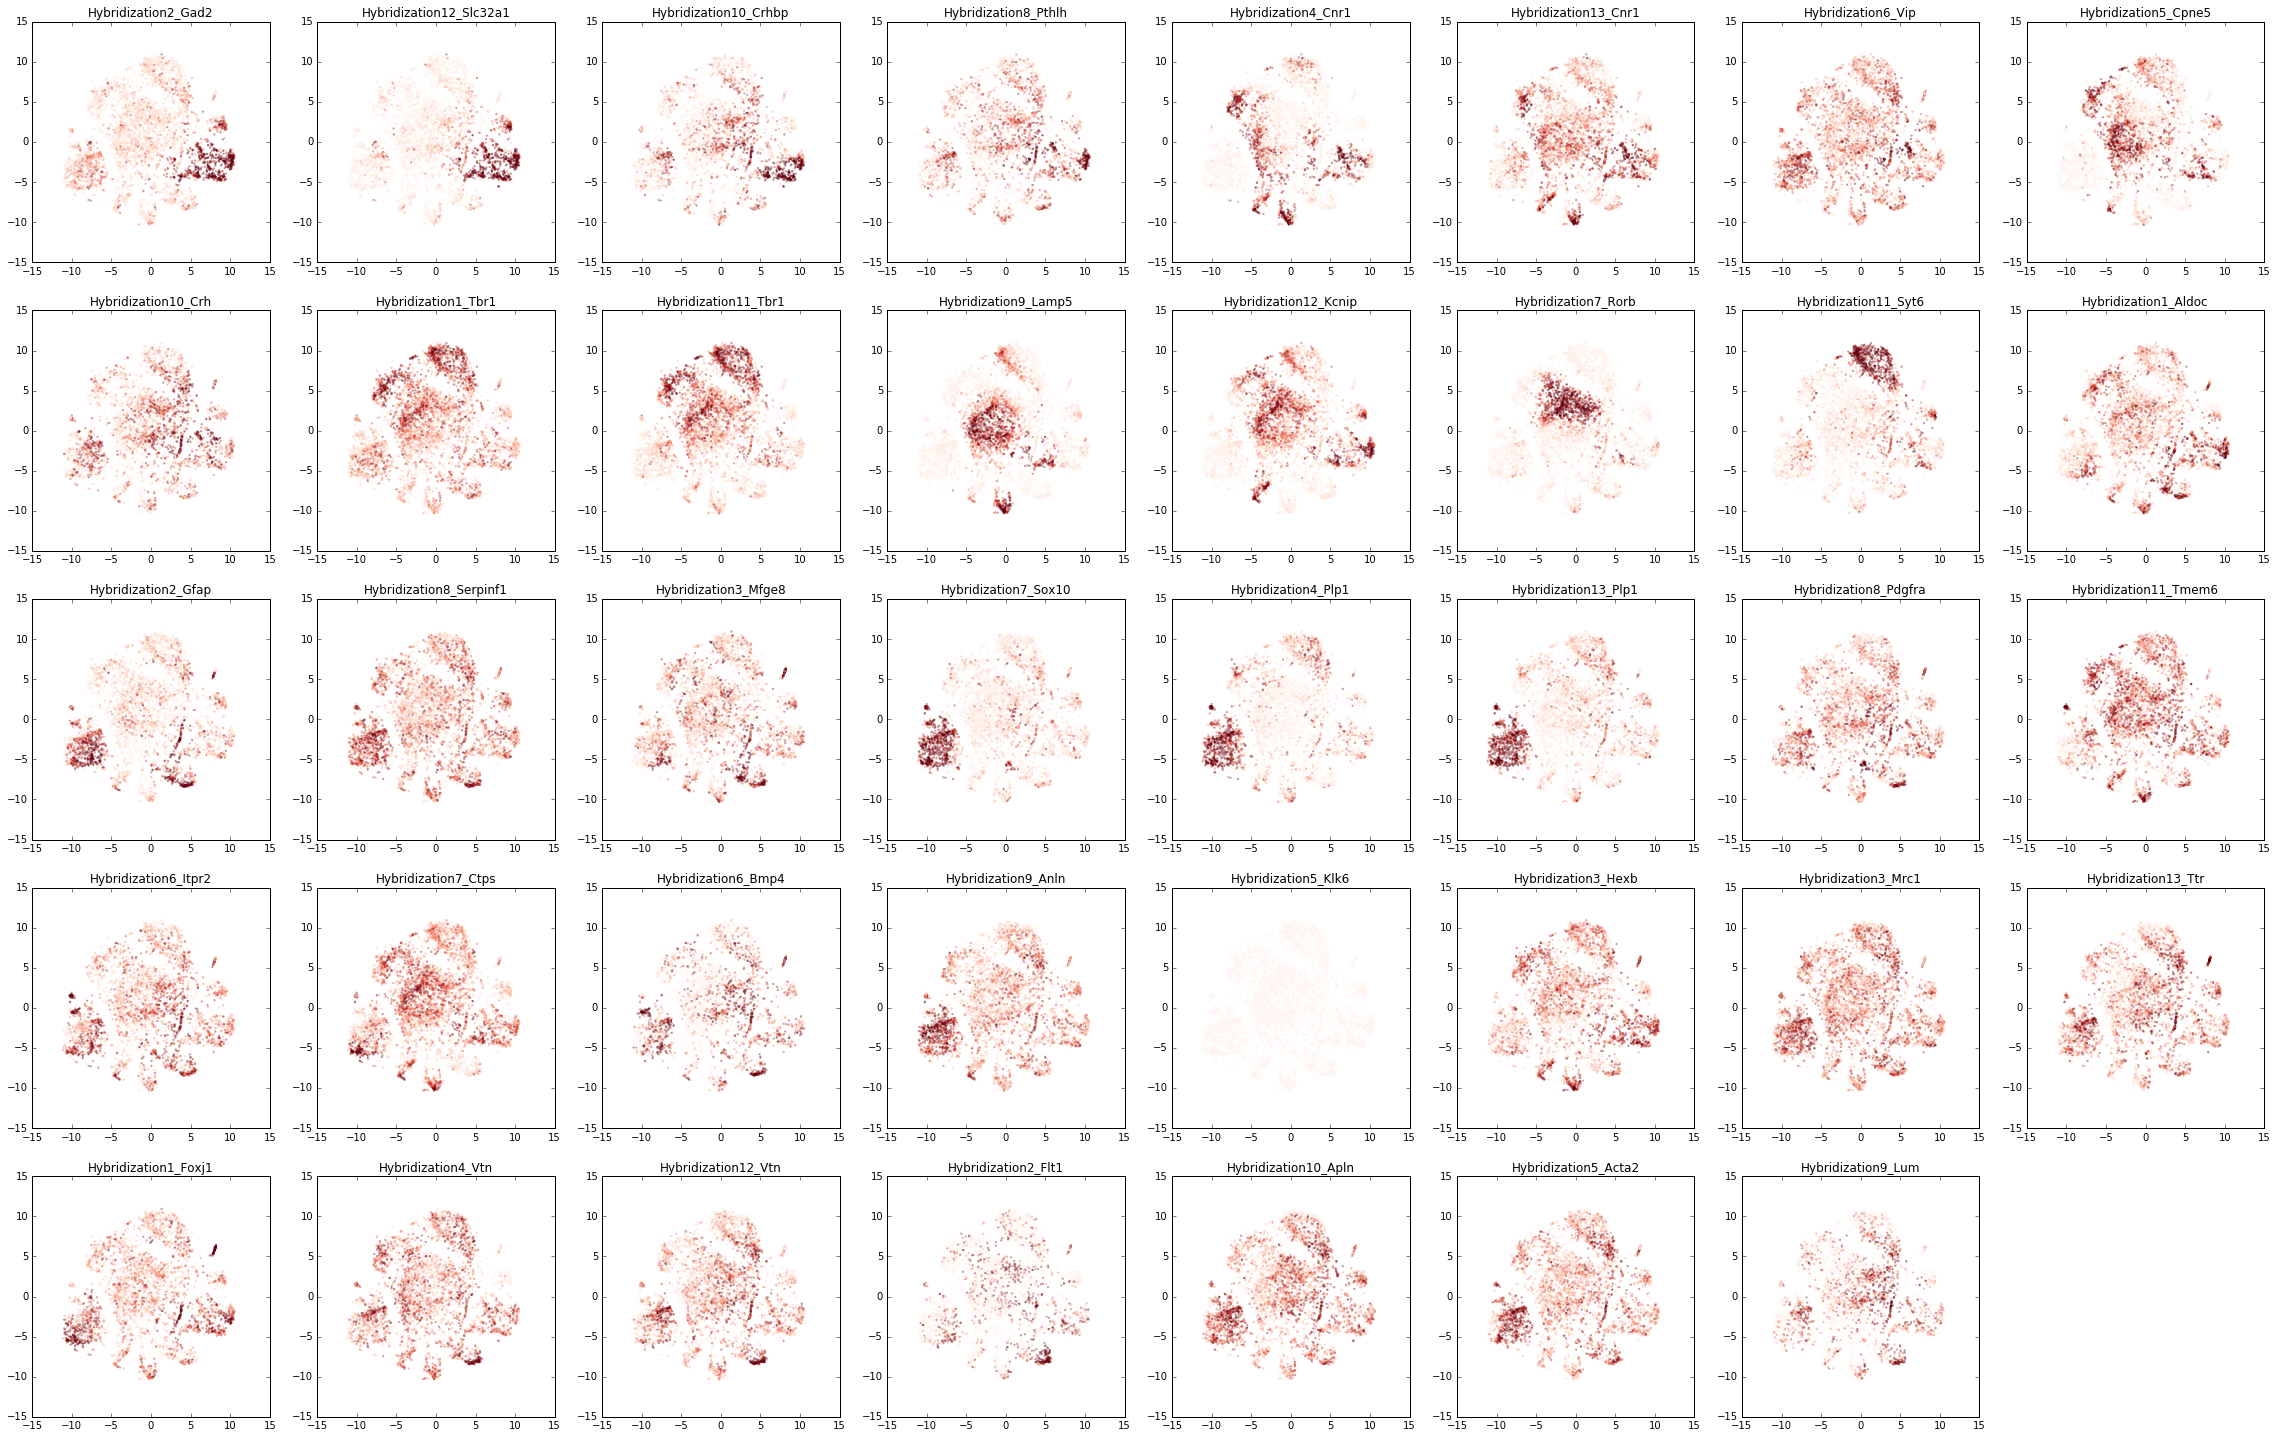

In [46]:
plt.figure(figsize=(8*5,5*5))
gs = plt.GridSpec(5,8)

tSNE_points = points4 #tSNE_ncomp['points_35']

for i, gene in enumerate(probe_sort): #df.index):
    plt.subplot(gs[i])
    filt = df.index == gene
    levels = X[filt,:].flat[:]
    levels = np.clip(levels, np.percentile(levels, 10), np.percentile(levels,90))
    plt.scatter(tSNE_points[:,0], tSNE_points[:,1],color=plt.cm.Reds(levels/max(levels)), lw=0, alpha=0.4,s=5)
    plt.title(gene)#.split('_')[-1])
    
plt.savefig('gene-expression_35-pc_default-param_tSNE_no-exlusion.png', dpi=150)